# Demics Demo

In [1]:
import os
import numpy as np
import demics as de
from matplotlib import pyplot as plt
Tensor = de.Tensor
ops = de.ops

## Reading an image

In [2]:
os.listdir('images')

['test.tif']

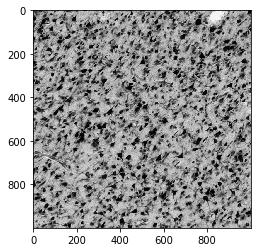

In [3]:
tensor = Tensor.from_file('images/test.tif')
plt.imshow(tensor, cmap='gray')

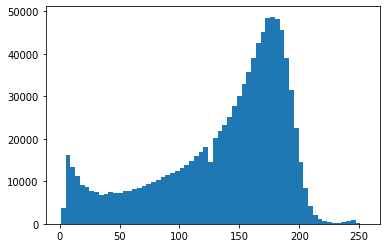

In [4]:
tensor = Tensor.from_file('images/test.tif')
plt.hist(tensor.ravel(), bins=64)
plt.show()

## Reading only a part of an image from disk

In [5]:
tensor = Tensor.from_file('images/test.tif')
tensor.shape, tensor.dtype, tensor

((1000, 1000),
 dtype('uint8'),
 Tensor with source: images\test.tif. Data not loaded yet.)

In [6]:
crop = tensor.lazy_load((slice(256), slice(256)))
crop.shape, crop.dtype, tensor.ndim

((256, 256), dtype('uint8'), 2)

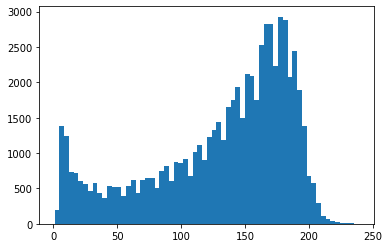

In [7]:
plt.hist(crop.ravel(), bins=64)
plt.show()

In [8]:
tensor

Tensor with source: images\test.tif. Data not loaded yet.

In [9]:
crop

Tensor([[175, 182, 189, ..., 191, 178, 186],
        [188, 191, 184, ..., 206, 202, 189],
        [162, 185, 158, ..., 192, 196, 182],
        ...,
        [ 42,  74,  92, ..., 161, 147, 121],
        [ 86, 115, 131, ..., 164, 154, 150],
        [131, 153, 145, ..., 168, 163, 156]], dtype=uint8)

## Reading volumes from 2D images

In [10]:
os.listdir('volumes')

['img_Slice00.tif',
 'img_Slice01.tif',
 'img_Slice02.tif',
 'img_Slice03.tif',
 'img_Slice04.tif',
 'img_Slice05.tif',
 'img_Slice06.tif',
 'img_Slice07.tif',
 'img_Slice08.tif',
 'img_Slice09.tif',
 'img_Slice10.tif',
 'img_Slice11.tif',
 'img_Slice12.tif',
 'img_Slice13.tif',
 'img_Slice14.tif',
 'img_Slice15.tif',
 'img_Slice16.tif',
 'img_Slice17.tif',
 'img_Slice18.tif',
 'img_Slice19.tif',
 'img_Slice20.tif',
 'img_Slice21.tif',
 'img_Slice22.tif',
 'img_Slice23.tif',
 'img_Slice24.tif',
 'img_Slice25.tif',
 'img_Slice26.tif',
 'img_Slice27.tif',
 'img_Slice28.tif']

In [11]:
tensor = Tensor.from_file('volumes/img_Slice.*.tif')
tensor

Tensor with source: list(
  (0): volumes\img_Slice00.tif,
  (1): volumes\img_Slice01.tif,
  (2): volumes\img_Slice02.tif,
  (3): volumes\img_Slice03.tif,
  (4): volumes\img_Slice04.tif,
  (5): volumes\img_Slice05.tif,
  (6): volumes\img_Slice06.tif,
  (7): volumes\img_Slice07.tif,
  (8): volumes\img_Slice08.tif,
  (9): volumes\img_Slice09.tif,
  (10): volumes\img_Slice10.tif,
  (11): volumes\img_Slice11.tif,
  (12): volumes\img_Slice12.tif,
  (13): volumes\img_Slice13.tif,
  (14): volumes\img_Slice14.tif,
  (15): volumes\img_Slice15.tif,
  (16): volumes\img_Slice16.tif,
  (17): volumes\img_Slice17.tif,
  (18): volumes\img_Slice18.tif,
  (19): volumes\img_Slice19.tif,
  (20): volumes\img_Slice20.tif,
  (21): volumes\img_Slice21.tif,
  (22): volumes\img_Slice22.tif,
  (23): volumes\img_Slice23.tif,
  (24): volumes\img_Slice24.tif,
  (25): volumes\img_Slice25.tif,
  (26): volumes\img_Slice26.tif,
  (27): volumes\img_Slice27.tif,
  (28): volumes\img_Slice28.tif,
). Data not loaded yet.

In [12]:
tensor.shape, tensor.dtype, tensor.ndim

((512, 512, 29), dtype('uint8'), 3)

In [13]:
print('Range:', tensor.min(), ',', tensor.max())

Range: 1 , 243


In [14]:
tensor

Tensor([[[140, 144, 145, ..., 143, 145, 148],
         [138, 142, 142, ..., 150, 147, 147],
         [137, 141, 141, ..., 150, 147, 140],
         ...,
         [194, 189, 189, ..., 191, 189, 191],
         [192, 191, 191, ..., 188, 187, 188],
         [192, 191, 194, ..., 194, 188, 190]],

        [[143, 144, 143, ..., 145, 145, 147],
         [138, 143, 143, ..., 147, 149, 146],
         [138, 140, 143, ..., 148, 147, 143],
         ...,
         [191, 193, 190, ..., 190, 191, 189],
         [189, 187, 191, ..., 191, 187, 189],
         [194, 192, 192, ..., 192, 194, 190]],

        [[141, 144, 150, ..., 151, 145, 150],
         [140, 140, 146, ..., 152, 149, 146],
         [141, 141, 145, ..., 148, 151, 143],
         ...,
         [189, 192, 195, ..., 189, 189, 193],
         [191, 190, 195, ..., 188, 189, 188],
         [187, 195, 196, ..., 196, 190, 189]],

        ...,

        [[157, 162, 162, ..., 158, 160, 160],
         [160, 160, 159, ..., 162, 152, 153],
         [152, 155

In [15]:
tensor = (tensor - tensor.mean()) / tensor.std()

In [16]:
tensor.mean().round(4), tensor.std().round(4)

(0.0, 1.0)